# MLP

In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import joblib

In [19]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [15]:
x,y = digits.data, digits.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(f" {x.shape} and {y.shape}")
print(f" train set : {x_train.shape} and {y_train.shape}")
print(f" test set : {x_test.shape} and {y_test.shape}")

 (1797, 64) and (1797,)
 train set : (1437, 64) and (1437,)
 test set : (360, 64) and (360,)


# Fit

Before scaling :

In [16]:
clf = MLPClassifier(verbose=True)
clf.fit(x_train,y_train)

Iteration 1, loss = 6.71258946
Iteration 2, loss = 3.09292459
Iteration 3, loss = 1.88809383
Iteration 4, loss = 1.16838947
Iteration 5, loss = 0.78991118
Iteration 6, loss = 0.57656763
Iteration 7, loss = 0.45023888
Iteration 8, loss = 0.37179109
Iteration 9, loss = 0.31766453
Iteration 10, loss = 0.27686000
Iteration 11, loss = 0.24427437
Iteration 12, loss = 0.21731705
Iteration 13, loss = 0.19627757
Iteration 14, loss = 0.17524792
Iteration 15, loss = 0.16034244
Iteration 16, loss = 0.14513475
Iteration 17, loss = 0.13493067
Iteration 18, loss = 0.12179386
Iteration 19, loss = 0.11397417
Iteration 20, loss = 0.10485219
Iteration 21, loss = 0.09730867
Iteration 22, loss = 0.09039057
Iteration 23, loss = 0.08661291
Iteration 24, loss = 0.08212946
Iteration 25, loss = 0.07589807
Iteration 26, loss = 0.07132494
Iteration 27, loss = 0.06517622
Iteration 28, loss = 0.06308130
Iteration 29, loss = 0.05765402
Iteration 30, loss = 0.05688468
Iteration 31, loss = 0.05572041
Iteration 32, los

MLPClassifier(verbose=True)

accuracy :

In [17]:
print(f"train accuracy : {clf.score(x_train,y_train)}")
print(f"test accuracy : {clf.score(x_test,y_test)}")

train accuracy : 1.0
test accuracy : 0.9777777777777777


After scaling :

In [29]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)
print(x_train_scale[0])

[0.     0.     0.125  0.6875 0.75   0.0625 0.     0.     0.     0.125
 0.875  0.5625 0.5625 0.5    0.     0.     0.     0.625  0.75   0.
 0.8125 0.375  0.     0.     0.     0.4    0.3125 0.125  0.8125 0.125
 0.     0.     0.     0.     0.     0.625  0.5625 0.     0.     0.
 0.     0.     0.     0.0625 0.625  0.5625 0.0625 0.     0.     0.
 0.375  0.4375 0.     0.75   0.375  0.     0.     0.     0.0625 0.75
 1.     1.     0.3125 0.    ]


In [30]:
clf_scale = MLPClassifier(verbose=True)
clf_scale.fit(x_train_scale,y_train)

Iteration 1, loss = 2.26491740
Iteration 2, loss = 2.08237388
Iteration 3, loss = 1.93320008
Iteration 4, loss = 1.79007470
Iteration 5, loss = 1.64132577
Iteration 6, loss = 1.48979030
Iteration 7, loss = 1.34117548
Iteration 8, loss = 1.19786355
Iteration 9, loss = 1.06696701
Iteration 10, loss = 0.95014104
Iteration 11, loss = 0.84591908
Iteration 12, loss = 0.75652701
Iteration 13, loss = 0.68045205
Iteration 14, loss = 0.61633139
Iteration 15, loss = 0.56058456
Iteration 16, loss = 0.51316215
Iteration 17, loss = 0.47339882
Iteration 18, loss = 0.43843353
Iteration 19, loss = 0.40783162
Iteration 20, loss = 0.38196238
Iteration 21, loss = 0.35931661
Iteration 22, loss = 0.33844110
Iteration 23, loss = 0.32030951
Iteration 24, loss = 0.30551077
Iteration 25, loss = 0.28965081
Iteration 26, loss = 0.27689526
Iteration 27, loss = 0.26491376
Iteration 28, loss = 0.25457938
Iteration 29, loss = 0.24422927
Iteration 30, loss = 0.23554944
Iteration 31, loss = 0.22710436
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=True)

accuracy :

In [31]:
print(f"train accuracy : {clf_scale.score(x_train,y_train)}")
print(f"test accuracy : {clf_scale.score(x_test,y_test)}")

train accuracy : 0.9986082115518441
test accuracy : 0.9805555555555555


In [32]:
print(clf_scale.hidden_layer_sizes)

(100,)


# Prediction

In [34]:
y_pred = clf_scale.predict(x_test_scale)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0 36  1  0  0  1]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  1  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  1 44]]


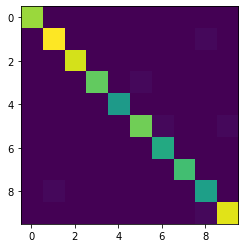

In [36]:
plt.imshow(cm)
plt.show()

# save

In [38]:
joblib.dump(clf_scale,filename="Mlp.pkl")

['Mlp.pkl']